In [3]:
import warnings
warnings.filterwarnings("ignore")

In this Notebook we will go over what Logistic Regression is, and how to implement it in Python with [RAPIDS](https://medium.com/future-vision/what-is-rapids-ai-7e552d80a1d2?source=friends_link&sk=64b79c363beeffb9923e16482f3977cc) cuML.

This Notebook can be run with a free GPU at [app.blazingsql.com](http://bit.ly/intro_ds_notebooks): `git clone https://github.com/Dropout-Analytics/cuml_logistic_regression`

# Beginner's Guide to Logistic Regression with cuML

Logistic regression is a model used for predicting the probability of events, given some other measurements. Logistic Regression is used when the dependent variable ("target") is categorical.

For example,
- Will the team win (1) or lose (0) this game?
- Are users going to stop using our app (1) or not (0)?

Logistic regression can also be used in non-binary situations, but let's cover that in a later post and stick to binary logistic regression for now.

![Logistic Regression gif (University of Toronto)](https://cdn-images-1.medium.com/max/800/0*JgBI4I1QeTYQRj8j.gif)

[Read more on Medium](https://medium.com/dropout-analytics/beginners-guide-to-logistic-regression-with-cuml-5061086d8694?source=friends_link&sk=2d8d0f7ddd43ccaaf264afcbadeea231)

In [4]:
import cudf

df = cudf.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv')

In [5]:
df.tail()

,height,weight,target,type
195,55.0,140.0,1.0,horse
196,82.0,179.0,1.0,horse
197,46.0,132.0,1.0,horse
198,56.0,89.0,1.0,horse
199,58.0,98.0,1.0,horse


## EDA - What's the data look like?
Before jumping in, let's explore our dataset. By converting cuDF `.to_pandas()`, we can utilize Matplotlib to visualize the overlaps in height and weight.

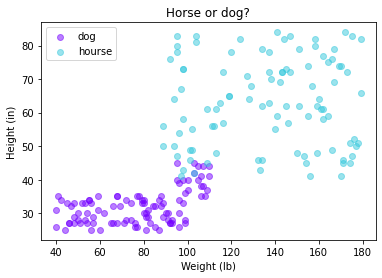

In [6]:
import matplotlib.pyplot as plt
import numpy as np


# scatter dogs
plt.scatter(x= df.loc[df.target == 0]['weight'].to_pandas(),
            y= df.loc[df.target == 0]['height'].to_pandas(),
            label= "dog",
            color='#7400ff',
            alpha=0.5)

# scatter horses
plt.scatter(x= df.loc[df.target == 1]['weight'].to_pandas(),
            y= df.loc[df.target == 1]['height'].to_pandas(),
            label= "hourse",
            color='#36c9dd',
            alpha=0.5)

plt.title('Horse or dog?')
plt.xlabel('Weight (lb)')
plt.ylabel('Height (in)')
plt.legend()
plt.show()

#### Height Histagram
First let's plot just the heights, by using a histagram we can also see how the height of our samples from each animal are distributed.

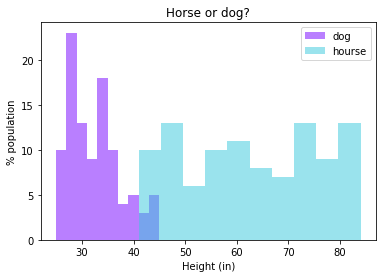

In [7]:
# histagram dog heights in purple 

plt.hist( df.loc[df.target == 0]['height'].to_pandas(),
            label= "dog",
            color='#7400ff',
            alpha=0.5)


       
# histagram horse heights in teal

plt.hist( df.loc[df.target == 1]['height'].to_pandas(),
            label= "hourse",
            color='#36c9dd',
            alpha=0.5)


# add plot details

plt.title('Horse or dog?')
plt.xlabel('Height (in)')
plt.ylabel('% population')
plt.legend()
plt.show()

#### Weight Scatter Plot
And now let's do something similar for weight. Since the distributions looked pretty uneven, let's focus in on their overlap when it comes to weight. We can do this by scattering the weights on the x-axis with a common y value of 0.

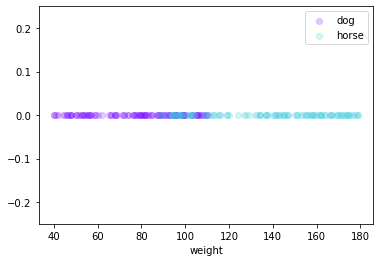

In [29]:
import numpy as np

# scatter dog weights
plt.scatter(df.loc[ df['target']==0 ]['weight'].to_pandas(), 
            y=np.zeros(df.loc[ df['target']==0 ]['weight'].shape), 
            label='dog', 
            color='#7400ff',
            alpha=0.2)

# scatter horse weights
plt.scatter(df[ df['target']==1 ]['weight'].to_pandas(), 
            y=np.zeros(df.loc[ df['target']==1 ]['weight'].shape), 
            label='horse', 
            color='#36c9dd',
            alpha=0.2)

# add plot details
plt.xlabel('weight'), plt.ylim([-0.25, 0.25])
plt.legend()


#### Data Prep
Using cuML's `train_test_split()` we can split our dataset into smaller training (`train`) and testing (`test`) datasets. This allows us to test our model with real data that it has never seen before. We'll drop the `type` column as the model will use `target` to differentiate between dogs and horses.

In [9]:
df.drop('type', axis='columns',inplace= True)
df.head()

,height,weight,target
0,27.0,71.0,0.0
1,27.0,92.0,0.0
2,32.0,47.0,0.0
3,30.0,90.0,0.0
4,28.0,91.0,0.0


In [10]:
from cuml.preprocessing import train_test_split

X=df.iloc[:,:2]
y= df.iloc[:,-1:]

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.8,stratify=y)

# 200 rows (160/40), 3 columns (2/1(''))

print("x train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x train (40, 2)
X_test (160, 2)
y_train (40, 1)
y_test (160, 1)


## Logistic Regression with cuML

![Dog rides her Horse](https://cdn-images-1.medium.com/max/800/0*ChQFw9yu7BD6Fz7g.gif)

In [11]:
from cuml.linear_model.logistic_regression import LogisticRegression

lr = LogisticRegression()

`.fit()` the model to train it.

In [12]:
model = lr.fit(X_train,y_train)

Make predictions.

In [13]:
preds = lr.predict(X_test)
preds.sample(5)

136    1.0
137    1.0
138    1.0
139    0.0
140    0.0
dtype: float64

#### How'd we do?

In [20]:
lr.score(X_test, y_test)

0.90625

In [25]:
df = X_test.copy()

df['actual'] = y_test.values
df['predicted'] = preds.values

correct = df[df['actual'] == df['predicted']]
n_correct = len(correct)


print(f'{n_correct}/{len(df)} correct. \n {n_correct/len(df)} accuracy. Nice.')

145/160 correct. 
 0.90625 accuracy. Nice.


# Continued Learning
Here are some resources to help fill in any gaps and provide a more complete understanding of Logistic Regression.

### **Reading**

#### CSC 411: Lecture 04: Logistic Regression
- University of Toronto: [04_prob_classif_handout.pdf](https://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/04_prob_classif_handout.pdf)
- by Richard Zemel, Raquel Urtasun and Sanja Fidler

#### Logistic Regression 
- Wikipedia: [wikipedia.org/wiki/Logistic_regression](https://wikipedia.org/wiki/Logistic_regression)

### **Videos**

#### StatQuest: Logistic Regression
- Watch on YouTube: https://youtu.be/yIYKR4sgzI8
- Channel: StatQuest with Josh Starmer ([Subscribe](https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw?sub_confirmation=1))

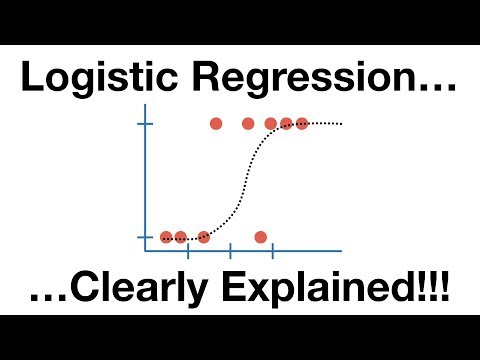

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo('yIYKR4sgzI8', width=(1280*0.667), height=(720*0.667))

#### Laplace Transform: First Order Equation
- Watch on YouTube: [https://youtu.be/9RJml41PFnc](https://youtu.be/9RJml41PFnc)
- Channel: MIT OpenCourseWare ([Subscribe](https://www.youtube.com/channel/UCEBb1b_L6zDS3xTUrIALZOw?sub_confirmation=1))

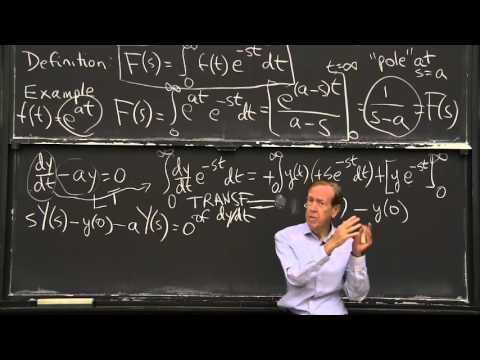

In [27]:
from IPython.display import YouTubeVideo
YouTubeVideo('9RJml41PFnc', width=(1280*0.667), height=(720*0.667))

#### Lecture 6.1 — Logistic Regression | Classification — — [ Machine Learning | Andrew Ng]
- Watch on YouTube: https://youtu.be/-la3q9d7AKQ
- Channel:  Artificial Intelligence - All in One ([Subscribe](https://www.youtube.com/channel/UC5zx8Owijmv-bbhAK6Z9apg?sub_confirmation=1))
  - **Note**: I'd recomend the [whole 6.x Lecture](https://www.youtube.com/playlist?list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy) (6.1 - 6.7) if you want to understand the math behind logistic regression.

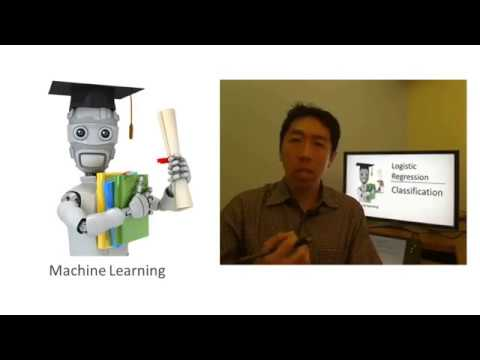

In [28]:
from IPython.display import YouTubeVideo
YouTubeVideo('-la3q9d7AKQ', width=(854), height=(480))